In [1]:
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_size = 100

##CARGAMOS EL MODELO
reload_model = tf.keras.models.load_model('IA_model')

In [3]:
archivo_train_y = open('Data_source\\Datasets\\y_train.pickle', 'rb')
data_train_y = pickle.load(archivo_train_y)
y_train = np.asarray(data_train_y)
archivo_train_y.close()

##TEST
archivo_test_x = open('Data_source\\Datasets\\x_test.pickle', 'rb')
data_test_x = pickle.load(archivo_test_x)
x_test = np.asarray(data_test_x).astype(float)/255.00
archivo_test_x.close()

archivo_test_y = open('Data_source\\Datasets\\y_test.pickle', 'rb')
data_test_y = pickle.load(archivo_test_y)
y_test = np.asarray(data_test_y)
archivo_test_y.close()

##CARGAMOS LOS ASCII DE LAS ETIQUETAS CON LAS QUE SE ENTRENÓ
archivo_class = open('Data_source\\Datasets\\class.pickle', 'rb')
data_class = pickle.load(archivo_class)
z_class = np.asarray(data_class)
archivo_class.close()

In [70]:
Num_imagen = 0

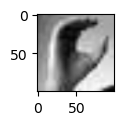

In [71]:
##SELECCIONAMOS LA IMÁGEN (38)
plt.figure(figsize = (1,1))
plt.imshow(x_test[Num_imagen], cmap="gray")
plt.show()

In [72]:
##ENVIAMOS LA DATA QUE QUEREMOS PREDECIR
imagen = x_test[Num_imagen].reshape(-1, img_size,img_size, 1) ##HACEMOS RESHAPE A LA IMÁGEN
predictions = reload_model.predict(imagen) ##ENVIAMOS LA PREDICCIÓN

1/1 [==============================] - 0s 15ms/step


In [73]:
##HACEMOS EXPAND PARA AUMENTAR UNA DIMENSIÓN A LA IMÁGEN
predictions = (np.expand_dims(predictions,0))

In [74]:
##OBSERVAMOS EL ARRAY DE PREDICTIONS SEGÚN LA CLASIFICACIÓN QUE LE DA A LA IMÁGEN
predictions[0]

array([[2.0693123e-15, 3.0475993e-31, 9.9938369e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [75]:
##BUSCAMOS EL MAX DENTRO DEL ARRAY, QUE REPRESENTA EL NUMERO DE LA CATEGORIA DENTRO DE Y
class_t = np.argmax(predictions[0])

In [76]:
##BUSCAMOS EL NÚMERO DE LA CATEGORIA DENTRO DE Y
num_cat = np.argmax(y_train == class_t)

In [77]:
num_cat

0

In [78]:
##BUSCAMOS Y CONVERTIMOS EL ASCII DE LA CATEGORÍA 
chr(z_class[num_cat])

'C'